# Chapter 03 - Solution to exercise 2

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

colors = plt.cycler(color=["#557A95",   "#957055", "#559570"]) 
sns.set_context('paper', font_scale=1.4)
plt.rcParams['figure.figsize'] = [9,6]
plt.rcParams['savefig.dpi'] = 300
plt.rc("legend", frameon=False)
plt.rc("axes.spines", top=False, right=False)
plt.rcParams['axes.prop_cycle'] = colors
mycolors = colors.by_key()["color"]

In [417]:
#n = 1000
#rainy_weekend = np.random.choice([0,1],p=[0.8,0.2], size=n)
#discounts = np.random.choice(np.linspace(0,0.2,50),size=n)#np.random.randint(low=0,high=20,size=n)/100
#eps = np.random.normal(0,1, size=n)*2
##sales = 10 + 0*rainy_weekend + 30*np.where(discounts<10,1,0) -30*np.where(discounts>10,1,0) + 30*rainy_weekend*discounts + eps
#sales = 10 + 0*rainy_weekend + 0*(((discounts - np.mean(discounts))/np.std(discounts)))**2 + 50*rainy_weekend*discounts + eps
#
#df = pd.DataFrame({
#    "rainy_weekend": rainy_weekend,
#    "discounts":discounts, 
#    #"rainxdiscount": rainy_weekend * discounts, 
#    "sales": sales ,
#})
#df.to_csv("Discounts.csv")

In [419]:
import pandas as pd 
link = "https://raw.githubusercontent.com/fredzett/Notebooks/master/Discounts.csv"
df = pd.read_csv(link, usecols=["sales","rainy_weekend","discounts"])
df.head()

,rainy_weekend,discounts,sales
0,0,0.057143,13.241597
1,0,0.020408,10.754894
2,0,0.053061,12.110971
3,1,0.044898,14.847392
4,0,0.130612,11.974153


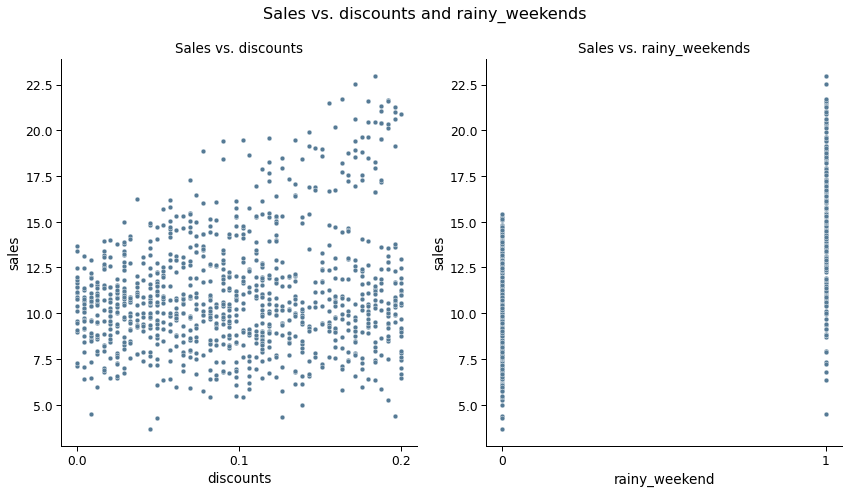

In [421]:
fig, axes = plt.subplots(ncols=2, figsize=(12,7))
ax1, ax2 = axes
sns.scatterplot(x="discounts",y="sales", data=df, ax=ax1)
ax1.set_xticks([0,0.1,0.2]);
ax1.set_title("Sales vs. discounts")
sns.scatterplot(x="rainy_weekend", y="sales", data=df, ax=ax2)
ax2.set_xticks([0,1]);
ax2.set_title("Sales vs. rainy_weekends")
plt.suptitle("Sales vs. discounts and rainy_weekends")
plt.tight_layout()
plt.savefig("../assets/sales_discounts_rainy.png")

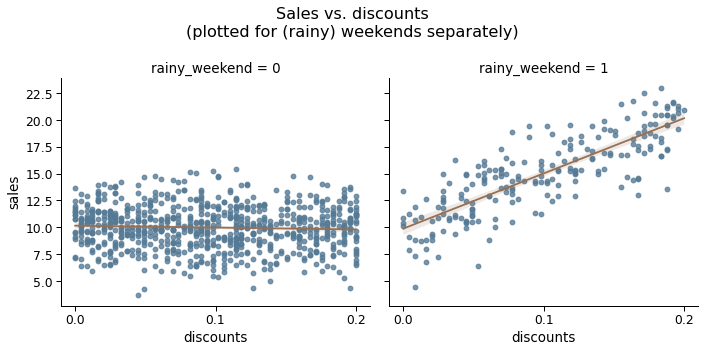

In [430]:
sns.lmplot(x="discounts",y="sales",col="rainy_weekend",data=df, line_kws={"color":mycolors[1]})
plt.xticks([0,0.1,0.2]);
plt.xlim([-0.01,0.21]);
plt.suptitle("Sales vs. discounts\n(plotted for (rainy) weekends separately)")
plt.tight_layout()
plt.savefig("../assets/discounts_interaction_visualization.png")

In [396]:
model = smf.ols("sales ~ rainy_weekend + discounts", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     402.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          8.70e-129
Time:                        09:33:00   Log-Likelihood:                -2245.9
No. Observations:                1000   AIC:                             4498.
Df Residuals:                     997   BIC:                             4513.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.0718      0.146     62.017      0.000       8.785       9.359
rainy_weekend     4.8845      0.178     27.378      0.000       4.534       5.235
discounts         9.4763      1.245      7.611      0.000       7.033      11.919
==============================================================================
Omnibus:                        1.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.163
Skew:                           0.058   Prob(JB):                        0.559
Kurtosis:                       3.120   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [397]:
model = smf.ols("sales ~ rainy_weekend + discounts + discounts:rainy_weekend", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     515.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.04e-202
Time:                        09:33:06   Log-Likelihood:                -2073.1
No. Observations:                1000   AIC:                             4154.
Df Residuals:                     996   BIC:                             4174.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.1949      0.135     75.513      0.000       9.930      10.460
rainy_weekend              -0.0285      0.285     -0.100      0.920      -0.588       0.531
discounts                  -2.0263      1.192     -1.700      0.089      -4.365       0.312
discounts:rainy_weekend    50.7656      2.503     20.279      0.000      45.853      55.678
==============================================================================
Omnibus:                        1.185   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.056
Skew:                          -0.041   Prob(JB):                        0.590
Kurtosis:                       3.137   Cond. No.                         43.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Importance of visualization

In [479]:
df = sns.load_dataset("anscombe")
df.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [480]:
funcs = [len, np.mean, np.min, np.max, np.median, np.std]
descriptives = df.groupby("dataset",).agg(funcs).round(2)
descriptives

x                                  y                           \
          len mean amin  amax median   std   len mean  amin   amax median   
dataset                                                                     
I        11.0  9.0  4.0  14.0    9.0  3.32  11.0  7.5  4.26  10.84   7.58   
II       11.0  9.0  4.0  14.0    9.0  3.32  11.0  7.5  3.10   9.26   8.14   
III      11.0  9.0  4.0  14.0    9.0  3.32  11.0  7.5  5.39  12.74   7.11   
IV       11.0  9.0  8.0  19.0    8.0  3.32  11.0  7.5  5.25  12.50   7.04   

               
          std  
dataset        
I        2.03  
II       2.03  
III      2.03  
IV       2.03

In [481]:
mymodels = []
for i in ["I","II","III","IV"]:
    model = smf.ols("y ~ x", data=df[df["dataset"]==i]).fit()
    mymodels.append(model)

In [483]:
mymodels[0].summary()

/Users/felix/opt/anaconda3/envs/mlbasic/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 03 Nov 2021   Prob (F-statistic):            0.00217
Time:                        12:05:46   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [484]:
mymodels[1].summary()

/Users/felix/opt/anaconda3/envs/mlbasic/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 03 Nov 2021   Prob (F-statistic):            0.00218
Time:                        12:05:56   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [485]:
mymodels[2].summary()

/Users/felix/opt/anaconda3/envs/mlbasic/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 03 Nov 2021   Prob (F-statistic):            0.00218
Time:                        12:06:05   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [486]:
mymodels[3].summary()

/Users/felix/opt/anaconda3/envs/mlbasic/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 03 Nov 2021   Prob (F-statistic):            0.00216
Time:                        12:06:12   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

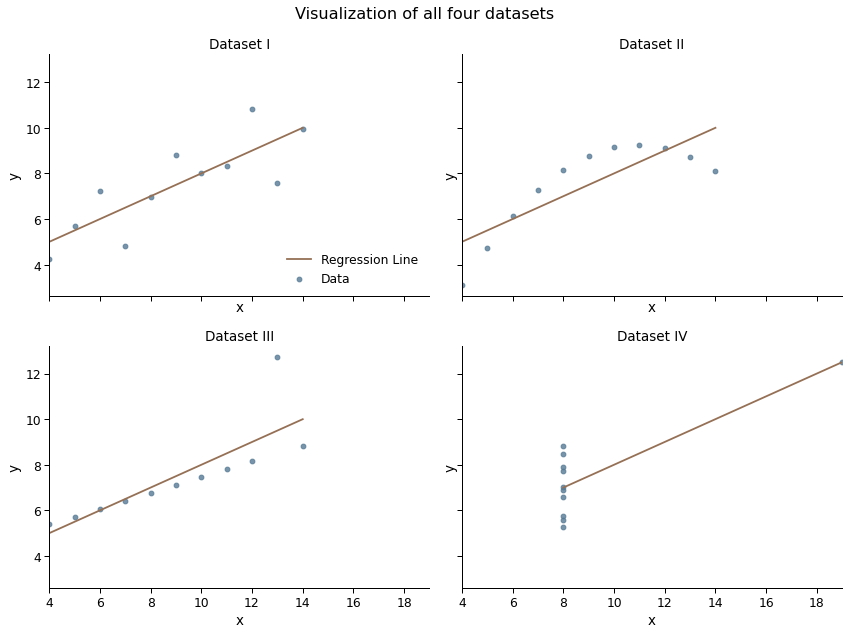

In [507]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,9))
axes = axes.flatten()


for i, ax in zip(["I","II","III","IV"], axes):
    sns.regplot(x="x", y="y", data=df[df["dataset"]==i], ax=ax, ci=False, line_kws={"color": mycolors[1]} )
    ax.set_title(f"Dataset {i}")
    if i == "I":
        ax.legend(("Regression Line","Data"),loc="lower right")

plt.suptitle("Visualization of all four datasets")
plt.tight_layout()
plt.savefig("../assets/anscombe.png")